# Finance Data Project

**Importing various data and visualization libraries**

In [22]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline

Retrieving stock data of various banks off pandas_datareader

In [2]:
start = '2006-01-01'
end = '2016-01-01'

In [3]:
BAC = data.DataReader('BAC','yahoo',start, end)
C = data.DataReader('C','yahoo',start, end)
GS = data.DataReader('GS','yahoo',start, end)
JPM = data.DataReader('JPM','yahoo',start, end)
MS = data.DataReader('MS','yahoo',start, end)
WFC = data.DataReader('WFC','yahoo',start, end)

List of ticker symbols to later use in the project

In [4]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

**Combining all dataframe via concatenation along the columns**

In [5]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],keys=tickers,axis=1)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [6]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.938789  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.429329  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.455013  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.557716  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.596241  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.994202  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.408512  
2006-01-04   31.799999  31.530001  10870000.0  20.171795  
2006-01-05   31.500000  31.495001  10158000.0  20.149401  
2006-01-06   31.580000  31.680000   8403800.0  20.267757  
2006-01-09   31.674999  31.674999   5619600.0  20.264565  

[5 rows x 36 columns]

Exploring the data by first finding out the max closing prices for the respective banks in our dataframe

In [7]:
bank_stocks.loc[:,(slice(None),'Close')].max()

Bank Ticker  Stock Info
BAC          Close          54.900002
C            Close         564.099976
GS           Close         247.919998
JPM          Close          70.080002
MS           Close          89.300003
WFC          Close          58.520000
dtype: float64

OR

In [8]:
bank_stocks.xs('Close',level='Stock Info',axis=1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

**Creating new dataframe to store the returns of the bank stocks in question using pandas' pct_change method**

In [9]:
returns = bank_stocks.loc[:,(slice(None),'Close')].pct_change()
tickers2 = []
for tick in tickers:
    tickers2.append(tick + ' Return')
returns.columns = tickers2
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


Casting the new dataframe to seaborn's pairplot visualization function for a quick peek of the data

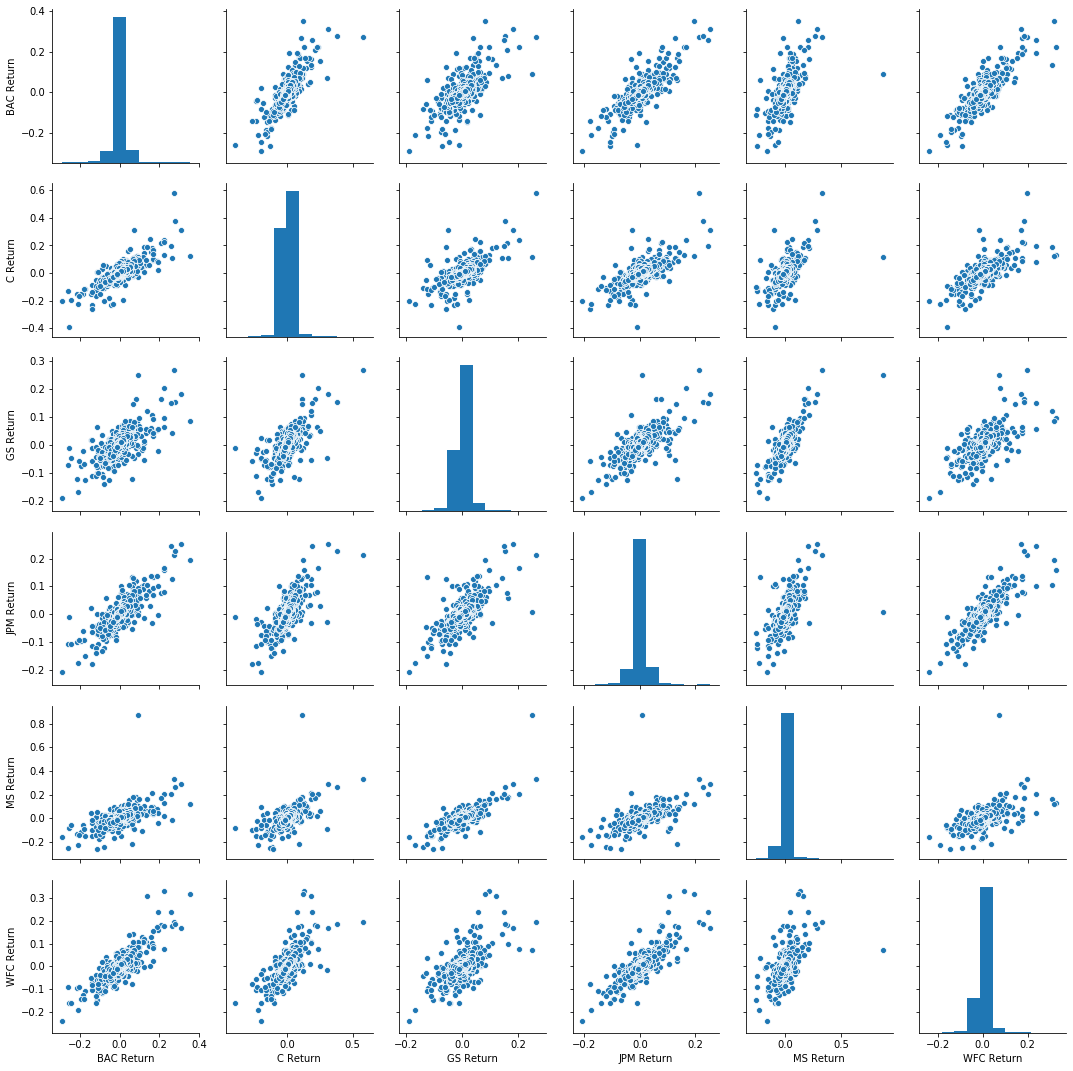

In [11]:
sns.pairplot(returns)
plt.show()

Further exploration of the data by figuring out the dates of the highest and lowest stock prices for each bank

In [12]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [13]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**We can get an idea of the risk of a stock by looking at some metrics**

Standard Deviation for entire time period and also for 2015

returns.std()

In [15]:
returns.groupby(returns.index.year).std().loc[2015]

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
Name: 2015, dtype: float64

Plotting the 2015 returns' distribution for Morgan Stanley

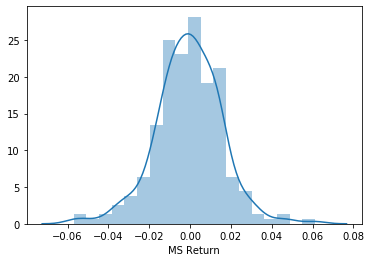

In [16]:
sns.distplot(returns[returns.index.year == 2015]['MS Return'].iloc[1:])
plt.show()

Plotting the 2008 returns' distribution for CitiGroup

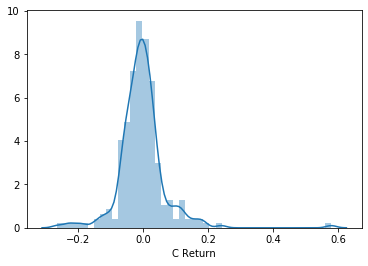

In [21]:
sns.distplot(returns[returns.index.year==2008]['C Return'].iloc[1:])
plt.show()

C:\Users\altorres\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



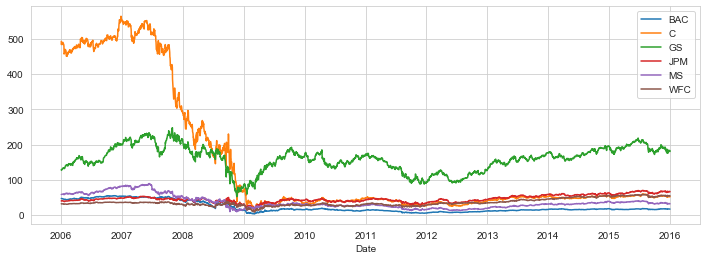

In [29]:
bank_stocks2 = bank_stocks.xs('Close',level = 'Stock Info',axis=1)
plt.figure(figsize=(12,4))
for tick in tickers:
    plt.plot(bank_stocks2.index,bank_stocks2[tick], label = tick)
plt.xlabel('Date')
plt.legend()

plt.show()

We can also use plotly for the above for additional dynamics

In [30]:
bank_stocks2.iplot()

**Moving averages using pandas rolling() function**

Plotting Bank of America's 30 day rolling average against its closing price for the year 2008 

In [39]:
#Setting the arguments to later pass to matplot's plot function

#MA30 is capturing BAC's 2008 moving average
#BAC_08 is capturing the periods within 2008 to later pass for the x axis of our plot
#BAC_Closing is capturing BAC's closing prices for year 2008

MA30 = bank_stocks2['BAC'][bank_stocks2.index.year==2008].rolling(30).mean()
BAC_08 = bank_stocks2[bank_stocks2.index.year == 2008].index
BAC_Closing = bank_stocks2[bank_stocks2.index.year == 2008]['BAC']

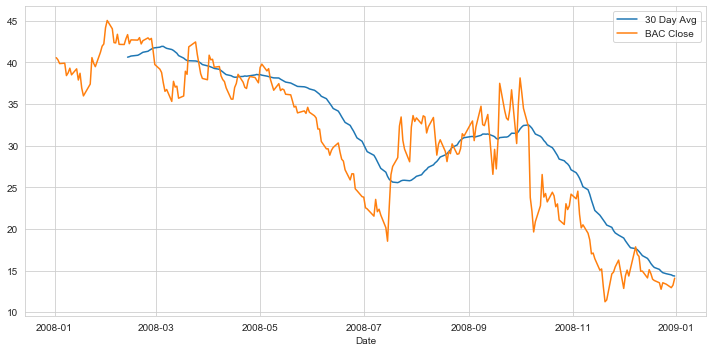

In [40]:
plt.figure(figsize=(10,5))

plt.plot(BAC_08,MA30, label = '30 Day Avg')
plt.plot(BAC_08,BAC_Closing, label = 'BAC Close')

plt.legend()
plt.xlabel('Date')

plt.tight_layout()
plt.show()

Creating a heatmap and a clustermap of the correlation between the closing prices of various our stocks

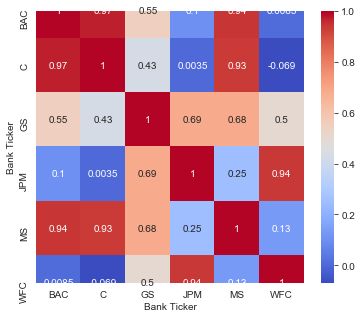

In [49]:
plt.figure(figsize=(6,5))
sns.heatmap(bank_stocks2.corr(), cmap = 'coolwarm', annot = True)
plt.show()

plt.figure(figsize=(6,5))
sns.clustermap(bank_stocks2.corr(), cmap = 'coolwarm', annot = True)
plt.show()

**Finally, leveraging cufflinks for additional visualization swag**

Creating a candle-plot for BAC's stock performance for fiscal year 2015 using .iplot(kind='candle')

In [59]:
BAC[['Open','High','Low','Close',]][BAC.index.year==2015].iplot(kind='candle')


Creating a 'Simple Moving Averages' plot for Morgan Stanley for the year 2015 using .ta_plot(study='sma')

In [60]:
MS['Close'][MS.index.year == 2015].ta_plot(study='sma',periods=[13,21,55], title = 'Simple Moving Averages')

Creating a 'Bollinger Band Plot' for BAC for the year 2015 using .ta_plot(study='boll')

In [61]:
BAC['Close'][BAC.index.year == 2015].ta_plot(study='boll')